In [105]:
import gensim
import numpy as np
import pandas as pd
import multiprocessing
import sklearn.manifold
import matplotlib.pyplot as plt

In [68]:
f = open('./GOT/got1.txt','r', encoding='utf-8')

In [69]:
df=[]
for line in f:
    df.append(line.strip('\n'))

In [71]:
df_set = set(df)

In [72]:
dff = pd.DataFrame(df_set) 

In [73]:
dff.head()

,0
0,
1,"It was hard to make out what was happening, bu..."
2,For a moment Arya forgot to breathe. Dead? Bra...
3,“The sea?”
4,"There is, thought Jon, remembering the night i..."


In [74]:
dff.shape

(8278, 1)

In [79]:
def pre_prcss(sent):
    return gensim.utils.simple_preprocess(str(sent).encode('utf-8'))    

In [80]:
documents = []
for x in dff[0]:
    documents.append(pre_prcss(x))

In [83]:
len(documents)

8278

In [84]:
model = gensim.models.Word2Vec(size=150, window=8, min_count=2, sg=1, workers=3)
model.build_vocab(documents)

In [85]:
model.train(sentences=documents, total_examples=len(documents), epochs=model.iter)

C:\Users\RAHUL\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """Entry point for launching an IPython kernel.


(1179178, 1570905)

In [87]:
word_vector = model.wv
type(word_vector)

gensim.models.keyedvectors.Word2VecKeyedVectors

In [89]:
len(word_vector.vocab)

8537

In [91]:
vector = word_vector['more']
print(len(vector))

150


In [92]:
vector

array([-0.02113924,  0.17611077,  0.28715461, -0.2314525 , -0.07951351,
        0.15023232, -0.34381098, -0.13342084, -0.16943969,  0.1945277 ,
       -0.10480734, -0.00652668, -0.03189506,  0.2481355 , -0.2254812 ,
       -0.26755488,  0.11363909,  0.14499347,  0.36022815, -0.07522094,
       -0.17597422, -0.05595857,  0.21388161, -0.12713203,  0.16166905,
       -0.17643493, -0.01071853,  0.12604064,  0.31720492, -0.16035609,
        0.06971765,  0.02077148, -0.34228057,  0.06789375, -0.37007725,
       -0.05122875, -0.26356068, -0.02713069, -0.11023891,  0.38243353,
        0.33030847, -0.3206716 , -0.1803671 , -0.21718788, -0.0083833 ,
       -0.02145846,  0.26164436,  0.42159617, -0.13785163, -0.12634367,
        0.01863157, -0.03198896,  0.25089243,  0.04561511, -0.12744051,
        0.2524177 ,  0.06598193,  0.15778832, -0.14069282,  0.16269615,
        0.00362835,  0.1566533 , -0.05648358,  0.24373169,  0.03464094,
       -0.0447811 , -0.20518735,  0.14882913, -0.33502394,  0.27

In [93]:
model.wv.most_similar(positive='more', topn=5)

[('less', 0.8723226189613342),
 ('larger', 0.8448131084442139),
 ('longer', 0.8192958831787109),
 ('worse', 0.8174786567687988),
 ('rather', 0.815028965473175)]

In [112]:
w1 = ["women","men"]
w2 = ["girls"]
model.wv.most_similar (positive=w1,negative=w2,topn=1)

[('boys', 0.7184538841247559)]

In [107]:
wanted_words = []
count = 0
for word in word_vector.vocab:
    if count<50:
        wanted_words.append(word)
        count += 1
    else:
        break
wanted_vocab = dict((k, word_vector.vocab[k]) for k in wanted_words if k in word_vector.vocab)
wanted_vocab

{'it': <gensim.models.keyedvectors.Vocab at 0x21d8a344088>,
 'was': <gensim.models.keyedvectors.Vocab at 0x21d8a34bec8>,
 'hard': <gensim.models.keyedvectors.Vocab at 0x21d8a314d88>,
 'to': <gensim.models.keyedvectors.Vocab at 0x21d8a314908>,
 'make': <gensim.models.keyedvectors.Vocab at 0x21d8a34e108>,
 'out': <gensim.models.keyedvectors.Vocab at 0x21d8a34e948>,
 'what': <gensim.models.keyedvectors.Vocab at 0x21d8a34ea88>,
 'happening': <gensim.models.keyedvectors.Vocab at 0x21d8a34eb48>,
 'but': <gensim.models.keyedvectors.Vocab at 0x21d8a312808>,
 'the': <gensim.models.keyedvectors.Vocab at 0x21d8a34e888>,
 'screams': <gensim.models.keyedvectors.Vocab at 0x21d8a34ea48>,
 'of': <gensim.models.keyedvectors.Vocab at 0x21d8a30c288>,
 'horses': <gensim.models.keyedvectors.Vocab at 0x21d8a30c508>,
 'seemed': <gensim.models.keyedvectors.Vocab at 0x21d8a30c688>,
 'loud': <gensim.models.keyedvectors.Vocab at 0x21d8a30c748>,
 'even': <gensim.models.keyedvectors.Vocab at 0x21d8a30c7c8>,
 'at':

In [108]:
X = model[wanted_vocab] # X is an array of word vectors, each vector containing 150 tokens
tsne_model = sklearn.manifold.TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
Y = tsne_model.fit_transform(X)

C:\Users\RAHUL\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


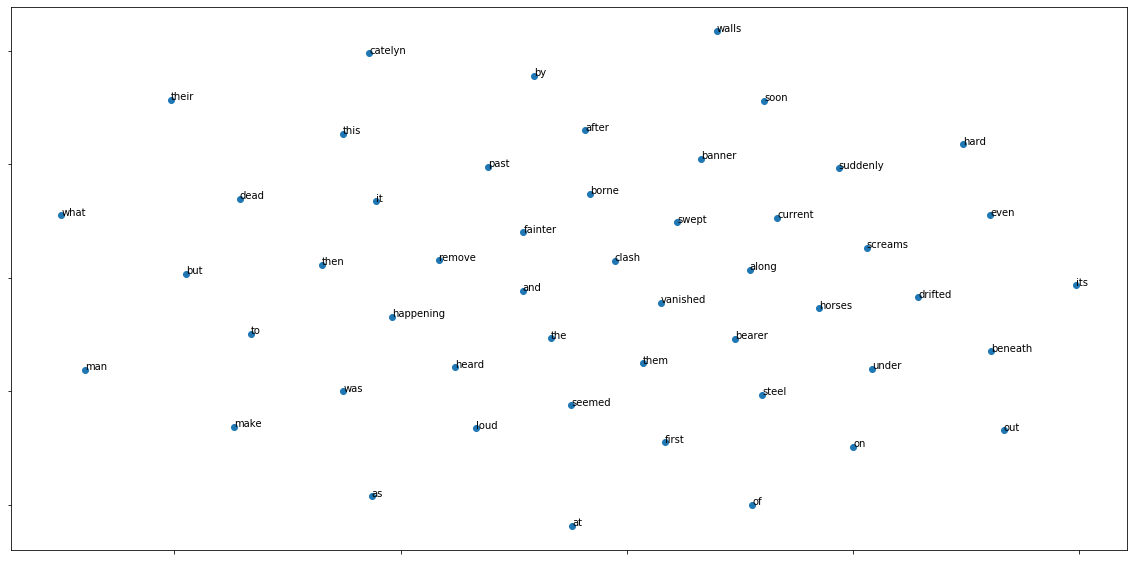

In [109]:
#Plot the t-SNE output
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(Y[:, 0], Y[:, 1])
words = list(wanted_vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks
_ = plt.show()